# Problem Statement

## Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 
For many incumbent operators, retaining high profitable customers is the number one business goal.
 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## 1. Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Setting display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Data Sourcing

In [3]:
# Reading the csv data file.
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the number of rows and columns in the dataframe
df.shape

(99999, 226)

In [5]:
# Checking the column-wise info of the dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Checking the summary for the numeric columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [7]:
# Creating a copy of the dataframe
df1 = df.copy()

In [8]:
# Checking columns with unique values 
df1.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [9]:
# Dropping columns with 1 unique value as it has no variance
u_col=[]
for i in df1.columns:
    if df1[i].nunique() == 1:
        u_col.append(i)

df1.drop(u_col, axis=1, inplace = True)
print("\nDropped columns with 1 unique value:\n",u_col)


Dropped columns with 1 unique value:
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
df1.shape

(99999, 210)

In [11]:
# Converting date columns to datetime format
dt_col= df1.select_dtypes(include=['object'])
print("\nDate columns with object datatype:\n",dt_col.columns)

for i in dt_col.columns:
    df1[i] = pd.to_datetime(df1[i])


Date columns with object datatype:
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9'], dtype='object')


In [12]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   arpu_6                    float64       
 2   arpu_7                    float64       
 3   arpu_8                    float64       
 4   arpu_9                    float64       
 5   onnet_mou_6               float64       
 6   onnet_mou_7               float64       
 7   onnet_mou_8               float64       
 8   onnet_mou_9               float64       
 9   offnet_mou_6              float64       
 10  offnet_mou_7              float64       
 11  offnet_mou_8              float64       
 12  offnet_mou_9              float64       
 13  roam_ic_mou_6             float64       
 14  roam_ic_mou_7             float64       
 15  roam_ic_mou_8             float64       
 16  roam_ic_mou_9             float64       
 17  roam_og_mou

## 3. Data Cleaning

### 3.1 Handling Missing Values

#### Checking percentage of missing for various columns

In [13]:
# Checking missing values in the dataset
((df1.isnull().sum()/df1.shape[0])*100).round(2).sort_values(ascending=False)

night_pck_user_6            74.85
arpu_2g_6                   74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
count_rech_2g_6             74.85
max_rech_data_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
night_pck_user_7            74.43
arpu_2g_7                   74.43
total_rech_data_7           74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
date_of_last_rech_data_9    74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
av_rech_amt_data_9          74.08
total_rech_data_9           74.08
arpu_3g_9                   74.08
count_rech_2g_9             74.08
night_pck_user

In [14]:
# Extracting columns related to recharge
rech_col =  df1.columns[df1.columns.str.contains('rech')]
print(rech_col)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'], dtype='object')


In [15]:
df1[rech_col].describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
total_rech_num_6,99999,NaN,NaT,NaN,NaT,NaT,7.55881,7.07841,0,3,6,9,307
total_rech_num_7,99999,NaN,NaT,NaN,NaT,NaT,7.70037,7.07042,0,3,6,10,138
total_rech_num_8,99999,NaN,NaT,NaN,NaT,NaT,7.21291,7.20375,0,3,5,9,196
total_rech_num_9,99999,NaN,NaT,NaN,NaT,NaT,6.89302,7.09626,0,3,5,9,131
total_rech_amt_6,99999,NaN,NaT,NaN,NaT,NaT,327.515,398.02,0,109,230,437.5,35190
total_rech_amt_7,99999,NaN,NaT,NaN,NaT,NaT,322.963,408.114,0,100,220,428,40335
total_rech_amt_8,99999,NaN,NaT,NaN,NaT,NaT,324.157,416.54,0,90,225,434.5,45320
total_rech_amt_9,99999,NaN,NaT,NaN,NaT,NaT,303.346,404.589,0,52,200,415,37235
max_rech_amt_6,99999,NaN,NaT,NaN,NaT,NaT,104.637,120.615,0,30,110,120,4010
max_rech_amt_7,99999,NaN,NaT,NaN,NaT,NaT,104.752,124.524,0,30,110,128,4010


##### Observation:
When the recharge date and the recharge value are missing together, it means that the customer didn't recharge.
The missing values in recharge variables with minumum value 1, can be imputed with zeroes since it means that no recharge was done by the customer for that month.

#### Imputing meaningful missing values with '0'

In [16]:
# Creating a list of columns where we will impute missing values with zeroes
zero_col= ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
           'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
           'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [17]:
# Imputing missing values with 0
df1[zero_col] = df1[zero_col].apply(lambda x: x.fillna(0))

In [18]:
df1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,2014-09-28,252,252,252,0,2014-06-21,2014-07-16,2014-08-08,NaT,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1

In [19]:
# Checking missing values after zero imputation
((df1[zero_col].isnull().sum()/df1.shape[0])*100).round(2).sort_values(ascending=False)

av_rech_amt_data_9    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_6    0.0
max_rech_data_9       0.0
max_rech_data_8       0.0
max_rech_data_7       0.0
max_rech_data_6       0.0
total_rech_data_9     0.0
total_rech_data_8     0.0
total_rech_data_7     0.0
total_rech_data_6     0.0
dtype: float64

In [20]:
df1.shape

(99999, 210)

In [21]:
# Dropping mobile number and date columns
df1 = df1.drop(['mobile_number',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ], axis=1)
df1.shape

(99999, 201)

#### Replacing NaN with -1 for categorical columns

In [22]:
# Creating list of categorical columns
cat_col = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
           'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

# Imputing missing values with a new category '-1'
df1[cat_col] = df1[cat_col].apply(lambda x: x.fillna(-1))

In [23]:
# Checking missing values of categorical columns
((df1[cat_col].isnull().sum()/df1.shape[0])*100).round(2).sort_values(ascending=False)

fb_user_9           0.0
fb_user_8           0.0
fb_user_7           0.0
fb_user_6           0.0
night_pck_user_9    0.0
night_pck_user_8    0.0
night_pck_user_7    0.0
night_pck_user_6    0.0
dtype: float64

In [24]:
df1.shape

(99999, 201)

#### Dropping columns with high percentage of missing (>=50%)

In [25]:
# Creating list of columns containing high missing percentage
high_col=[]
for i in df1.columns:
    if ((df1[i].isnull().sum()/df1.shape[0])).round(2)>0.5:
        high_col.append(i)

print("\nColumns dropped with more than 50% missing values:\n",high_col)


Columns dropped with more than 50% missing values:
 ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']


In [26]:
# Dropping columns with high missing percentage
df1.drop(high_col,axis=1,inplace=True)

In [27]:
# Verifying shape of dataframe after dropping columns
df1.shape

(99999, 185)

#### Imputation with mean/median/mode for columns with less percentage of missings

In [28]:
# Fetching columns with less missing percentage
df_null = ((df1.loc[:,:].isnull().sum()*100)/len(df1)).round(2)
df2 = pd.DataFrame(df_null)
df2.rename(columns={0:'Null_Percent'}, inplace=True)
df2 = df2[df2['Null_Percent']>0.00]

In [29]:
# Summary statistics of columns with less missing percentage
df1[df2.index].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
onnet_mou_6,96062.0,132.395875,297.207406,0.0,7.380,34.310,118.7400,7376.71
onnet_mou_7,96140.0,133.670805,308.794148,0.0,6.660,32.330,115.5950,8157.78
onnet_mou_8,94621.0,133.018098,308.951589,0.0,6.460,32.360,115.8600,10752.56
onnet_mou_9,92254.0,130.302327,308.477668,0.0,5.330,29.840,112.1300,10427.46
offnet_mou_6,96062.0,197.935577,316.851613,0.0,34.730,96.310,231.8600,8362.36
offnet_mou_7,96140.0,197.045133,325.862803,0.0,32.190,91.735,226.8150,9667.13
offnet_mou_8,94621.0,196.574803,327.170662,0.0,31.630,92.140,228.2600,14007.34
offnet_mou_9,92254.0,190.337222,319.396092,0.0,27.130,87.290,220.5050,10310.76
roam_ic_mou_6,96062.0,9.950013,72.825411,0.0,0.000,0.000,0.0000,13724.38
roam_ic_mou_7,96140.0,7.149898,73.447948,0.0,0.000,0.000,0.0000,15371.04


##### Observation:
Since there is a significant difference between the mean and median values of the columns with low percent of missing, we impute the columns with their respective median values

In [30]:
# Imputing missing values with their respective medians
for i in df2.index:
    df1[i] = df1[i].fillna(df1[i].median())

In [31]:
# Verifying summary statistics of dataframe
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,99999.0,282.987358,328.439770,-2258.709,93.4115,197.704,371.0600,27731.088
arpu_7,99999.0,278.536648,338.156291,-2014.045,86.9805,191.640,365.3445,35145.834
arpu_8,99999.0,279.154731,344.474791,-945.808,84.1260,192.080,369.3705,33543.624
arpu_9,99999.0,261.645069,341.998630,-1899.505,62.6850,176.849,353.4665,38805.617
onnet_mou_6,99999.0,128.534195,291.921906,0.000,8.0300,34.310,112.6100,7376.710
onnet_mou_7,99999.0,129.760024,303.405800,0.000,7.2900,32.330,108.8800,8157.780
onnet_mou_8,99999.0,127.604651,301.385516,0.000,7.4100,32.360,106.7400,10752.560
onnet_mou_9,99999.0,122.521442,297.505381,0.000,6.6300,29.840,99.0900,10427.460
offnet_mou_6,99999.0,193.934538,311.179884,0.000,36.7200,96.310,222.5350,8362.360
offnet_mou_7,99999.0,192.981175,320.156539,0.000,33.9600,91.735,217.8300,9667.130


In [32]:
# Verifying total missing values in the dataset after handling them
((df1.isnull().sum()/df1.shape[0])*100).round(2).sum()

0.0

### 3.2 Filter High-Value Customers (HVC)

#### Calculating average recharge amount using total recharge amounts of June & July

In [33]:
df1.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.

In [34]:
# Calculating average recharge done by customer in June and July
df1['av_rech_amt_6_7'] = (df1['total_rech_amt_6']+df1['total_rech_amt_7'])/2

In [35]:
df1.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58,307.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,1

#### Finding 70th percentile value of average recharge amount for June & July

In [36]:
# Finding the value of 70th percentile for defining the high value customer 
hvc = df1['av_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",hvc,"\n")


The 70th quantile value to determine the High Value Customer is:  368.5 



#### Filtering customers with average recharge amount >= 70th percentile amount

In [37]:
# Creating dataframe with high value customer data
df3 = df1[df1['av_rech_amt_6_7'] >= hvc]

In [38]:
# Verifying dimension of the dataframe
df3.shape

(30011, 186)

##### Observation:
There are 30,011 rows after selecting the customers who have recharged with value greater than or equal to the recharge value of the 70th percentile customer.

### 3.3 Derive Churn (target column)

#### Calculating total incoming and outgoing minutes of usage

In [39]:
df3['total_call_mou_9'] = df3.total_ic_mou_9 + df3.total_og_mou_9

In [40]:
df3.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,total_call_mou_9
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0,0.00
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.4

#### Calculating 2g and 3g data consumption

In [41]:
df3['total_data_mb_9'] =  df3.vol_2g_mb_9 + df3.vol_3g_mb_9

In [42]:
df3.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,total_call_mou_9,total_data_mb_9
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.

#### Creating churn variable: those who have not used either calls or internet in the month of September are customers who have churned
- Churn: Y=1
- Not Churn: Y=0

In [43]:
df3['Churn'] = df3.apply(lambda x: 1 if (x.total_call_mou_9 == 0 and x.total_data_mb_9 == 0) else 0, axis=1)

In [44]:
df3.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,total_call_mou_9,total_data_mb_9,Churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0,0.00,0.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00

#### Checking Churn percentage

In [45]:
print("Churn Percentage:")
print(round(df3.Churn.value_counts(normalize=True)*100,2))

Churn Percentage:
0    91.36
1     8.64
Name: Churn, dtype: float64


In [46]:
# Creating a list of column names for each month
cols_6 = df3.filter(regex='6$', axis=1).columns
cols_7 = df3.filter(regex='7$', axis=1).columns
cols_8 = df3.filter(regex='8$', axis=1).columns
cols_9 = df3.filter(regex='9$', axis=1).columns

In [47]:
len(cols_9)

47

#### Deleting columns that belong to the churn month (September)

In [48]:
df3 = df3.filter(regex='[^9]$', axis=1)
df3.shape

(30011, 142)

## 4. Data Preparation

### Derived variables & EDA

In [49]:
# Creating a new variable 'aon_months' from 'aon' to get age of network in months
df3['aon_months'] = (df3['aon']/30).round(0)

# Dropping 'aon' from the dataframe
df3.drop('aon',axis=1, inplace=True)

In [50]:
df3.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,Churn,aon_months
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,57.74,19.38,18.74,0.0,1185.0,1,27.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,21.03,910.65,122.16,0.0,519.0,0,10.0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968

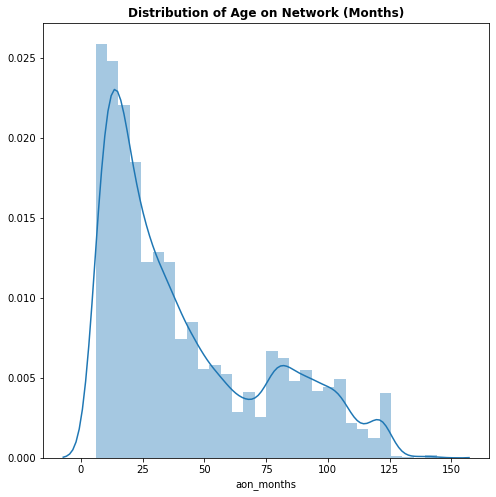

In [51]:
# Checking the distribution of aon_months
plt.figure(figsize=(8,8))
plt.title('Distribution of Age on Network (Months)', fontweight= 'bold')
sns.distplot(df3['aon_months'],bins=30)
plt.show()

In [52]:
mon_range = [0, 6, 12, 24, 60, 61]
mon_label = [ '<6 months', '6-12 months', '1-2 years', '2-5 years', '>5 years']
df3['aon_range'] = pd.cut(df3['aon_months'], mon_range, labels=mon_label)
df3['aon_range'].head()

7       2-5 years
8     6-12 months
13            NaN
16      1-2 years
17      1-2 years
Name: aon_range, dtype: category
Categories (5, object): [<6 months < 6-12 months < 1-2 years < 2-5 years < >5 years]

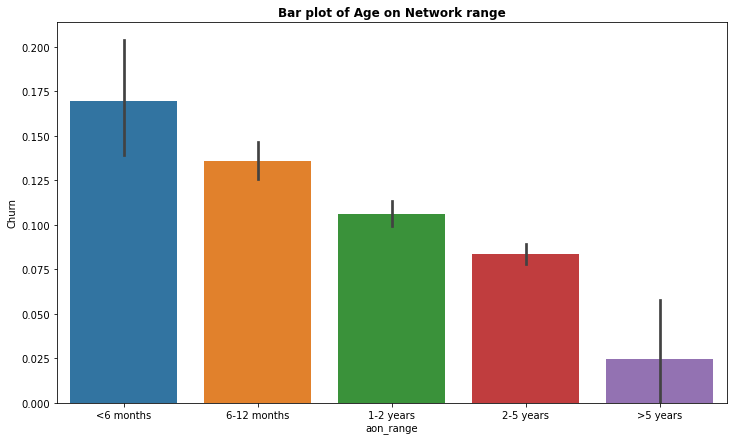

In [53]:
# Plotting Age on Network range
plt.figure(figsize=[12,7])
plt.title('Bar plot of Age on Network range', fontweight= 'bold')
sns.barplot(x='aon_range',y='Churn', data=df3)
plt.show()

##### Observation:
Maximum churn occurs within 6 months and it decreases for customers who are for longer period of time on the network.

In [54]:
df3.shape

(30011, 143)

In [55]:
# Deriving a new column average revenue per user for good phase from arpu_6 and arpu_7
df3["arpu_6_7"]= (df3['arpu_6']+df3['arpu_7'])/2
df3['arpu_6_7'].head()

7     1209.5150
8      435.4720
13     349.2585
16     365.4220
17     354.4940
Name: arpu_6_7, dtype: float64

In [56]:
# Dropping original columns 
df3.drop(['arpu_6','arpu_7'], axis=1, inplace=True)
df3.shape

(30011, 142)

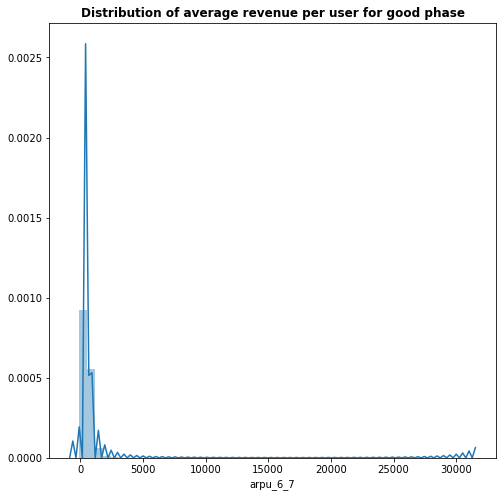

In [57]:
# Distribution of average revenue per user for good phase
plt.figure(figsize=[8,8])
plt.title('Distribution of average revenue per user for good phase', fontweight= 'bold')
sns.distplot(df3['arpu_6_7'])
plt.show()

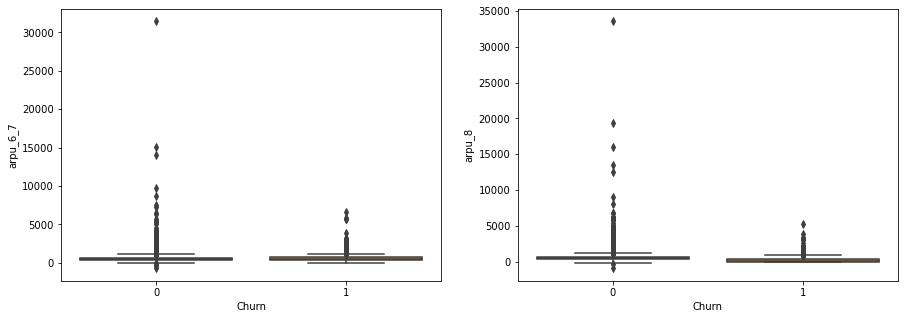

In [58]:
plt.figure(figsize=(15,5))
plt.title('Impact of average revenue over churn in good phase and action phase', fontweight= 'bold')
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn',y='arpu_6_7', data=df3)
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn',y='arpu_8', data=df3)
plt.show()

##### Observation:
The above visualization clearly shows that ARPU for churned customers drastically dropped from good phase (450 median arpu) to action month (150 median arpu) while for Non-churned customers it remains almost similar. This makes sense as people who have decided to churn in action phase (8th month) will spend very less.

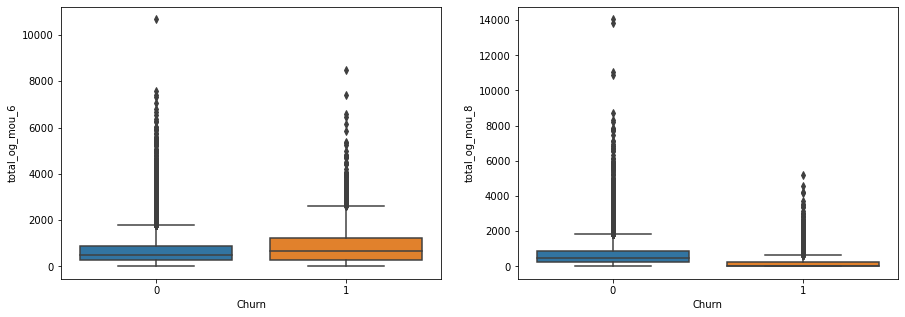

In [59]:
plt.figure(figsize=(15,5))
plt.title('Impact of outgoing mou over churn in good phase and action phase', fontweight= 'bold')
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn',y='total_og_mou_6', data=df3)
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn',y='total_og_mou_8', data=df3)
plt.show()

##### Observation:
The above visualization clearly shows that Total og mou for churned customers drastically dropped from good phase (200 median mou) to action month (50 median mou) while for Non-churned customers it remains almost similar (200 median mou). Thus, it shows that if there is significant drop in og_mou in 8th month, then there are high chances of churning. 

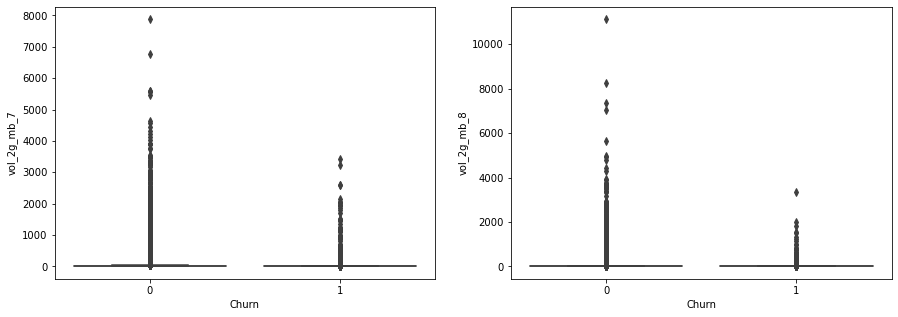

In [60]:
plt.figure(figsize=(15,5))
plt.title('Impact of 2g internet usage volume over churn in good phase and action phase', fontweight= 'bold')
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn',y='vol_2g_mb_7', data=df3)
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn',y='vol_2g_mb_8', data=df3)
plt.show()

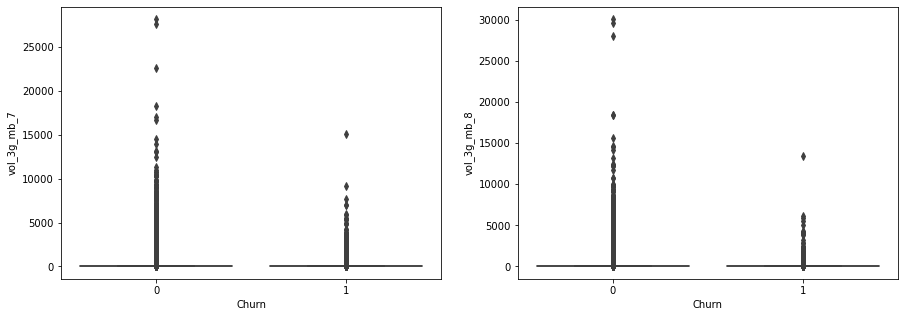

In [61]:
plt.figure(figsize=(15,5))
plt.title('Impact of 3g internet usage volume over churn in good phase and action phase', fontweight= 'bold')
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn',y='vol_3g_mb_7', data=df3)
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn',y='vol_3g_mb_8', data=df3)
plt.show()

##### Observation:
We observe that vol usage of 2g & 3g has dropped for churned customers from good phase to action phase, while for non churned its exactly the same. 

In [62]:
# Checking correlation of all variables with Churn
df3.corr()[['Churn']].sort_values(ascending=False, by='Churn')

,Churn
Churn,1.000000
std_og_mou_6,0.138133
std_og_t2m_mou_6,0.106466
std_og_t2t_mou_6,0.097457
roam_og_mou_7,0.093107
total_og_mou_6,0.084416
onnet_mou_6,0.075362
roam_og_mou_8,0.072375
total_rech_num_6,0.072270
roam_ic_mou_7,0.068258


##### Observation:
- Outgoing Calls, Roaming calls for the good phase (months 6 & 7) are positively correlated with Churn.
- Average Revenue per user, No. Of Recharges for the action phase (month 8) are negatively correlated with Churn.

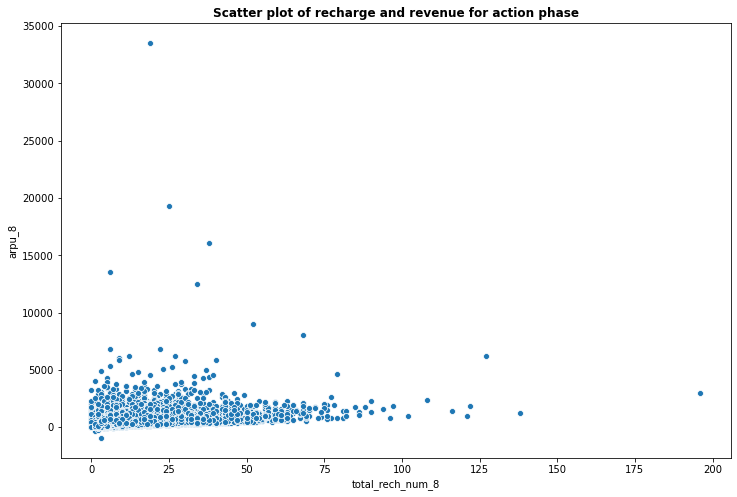

In [63]:
# Scatter plot between total recharge number and avg revenue per user for month 8
plt.figure(figsize=[12,8])
plt.title('Scatter plot of recharge and revenue for action phase', fontweight= 'bold')
sns.scatterplot(data=df3, x='total_rech_num_8', y='arpu_8')
plt.show()

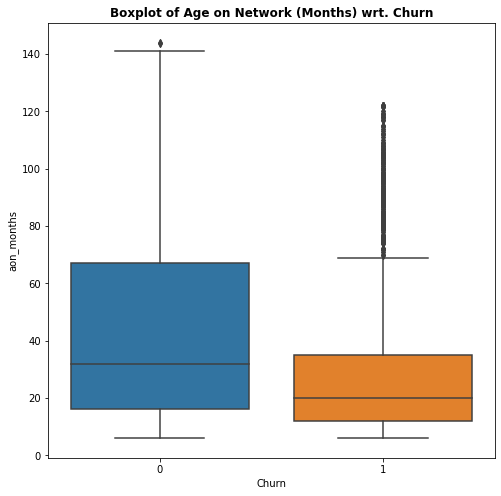

In [64]:
# Boxplot for age on network wrt. churn
plt.figure(figsize=[8,8])
plt.title('Boxplot of Age on Network (Months) wrt. Churn', fontweight= 'bold')
sns.boxplot(x = df3.Churn, y = df3.aon_months)
plt.show()

##### Observation:
The customers who use the network for longer periods churn less in comparison to those who use the network for short periods.

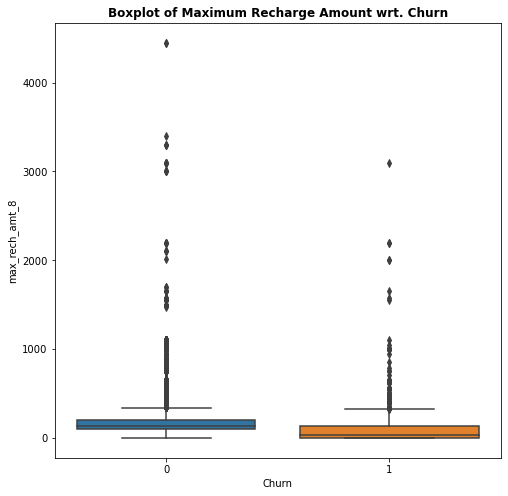

In [65]:
# Boxplot for max_rech_amt_8 wrt. churn
plt.figure(figsize=[8,8])
plt.title('Boxplot of Maximum Recharge Amount wrt. Churn', fontweight= 'bold')
sns.boxplot(x = df3.Churn, y = df3.max_rech_amt_8)
plt.show()

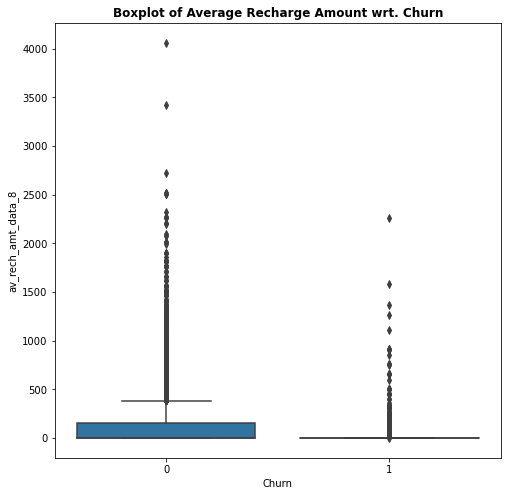

In [66]:
# Boxplot for av_rech_amt_data_8 wrt. churn
plt.figure(figsize=[8,8])
plt.title('Boxplot of Average Recharge Amount wrt. Churn', fontweight= 'bold')
sns.boxplot(x = df3.Churn, y = df3.av_rech_amt_data_8)
plt.show()

In [67]:
# Creating categories for total data recharge and the number of recharges done for month 8
df3['total_rech_data_range_8']=pd.cut(df3['total_rech_data_8'],[-1,0,10,25,100],labels=["0","<=10","10-25",">25"])
print('\nTotal recharge data range:\n',df3['total_rech_data_range_8'].value_counts())
df3['total_rech_num_range_8']=pd.cut(df3['total_rech_num_8'],[-1,0,10,25,1000],labels=["0","<=10","10-25",">25"])
print('\nTotal number of recharge range:\n',df3['total_rech_num_range_8'].value_counts())


Total recharge data range:
 0        18257
<=10     11468
10-25      256
>25         30
Name: total_rech_data_range_8, dtype: int64

Total number of recharge range:
 <=10     19130
10-25     8326
>25       1961
0          594
Name: total_rech_num_range_8, dtype: int64


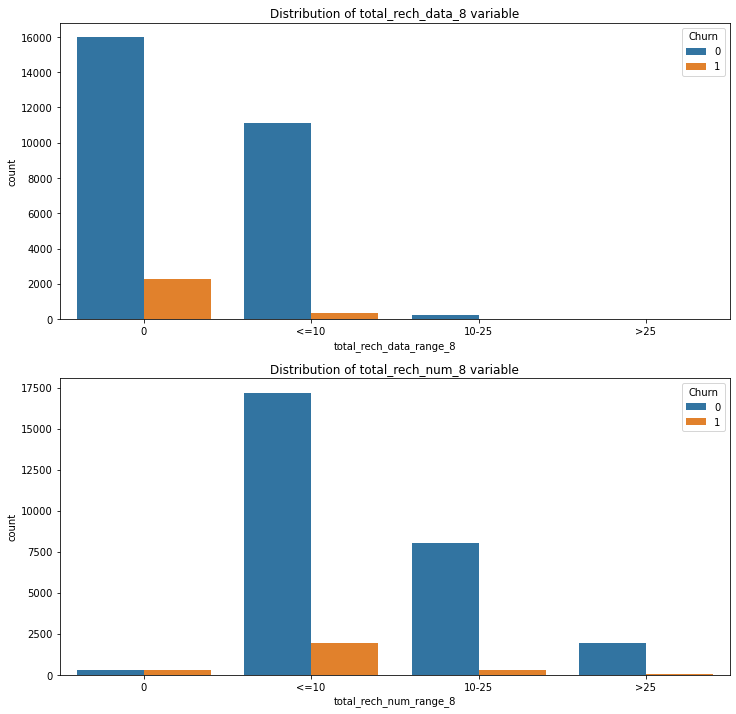

In [68]:
plt.figure(figsize=[12,12])
plt.subplot(2,1,1)
sns.countplot(data=df3,x="total_rech_data_range_8",hue="Churn")
plt.title('Distribution of total_rech_data_8 variable')
print()
plt.subplot(2,1,2)
sns.countplot(data=df3,x="total_rech_num_range_8",hue="Churn")
plt.title('Distribution of total_rech_num_8 variable')
plt.show()

##### Observation:
We can see that customer churn rate is directly proportional to the recharge data or number.

### Outlier treatment

In [69]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,30011.0,534.857433,492.259586,-945.808,289.60950,452.0910,671.150,33543.624
onnet_mou_6,30011.0,296.395727,460.556739,0.000,41.11000,125.8300,353.310,7376.710
onnet_mou_7,30011.0,304.669619,481.585086,0.000,40.95000,125.4600,359.925,8157.780
onnet_mou_8,30011.0,268.611830,466.014480,0.000,32.36000,99.4400,297.735,10752.560
offnet_mou_6,30011.0,418.947465,469.789933,0.000,137.33500,282.1900,523.125,8362.360
offnet_mou_7,30011.0,424.850559,485.804197,0.000,135.68000,281.9400,532.695,9667.130
offnet_mou_8,30011.0,377.901545,475.492462,0.000,95.69500,240.9400,482.610,14007.340
roam_ic_mou_6,30011.0,17.412764,79.152657,0.000,0.00000,0.0000,0.000,2613.310
roam_ic_mou_7,30011.0,13.522114,76.303736,0.000,0.00000,0.0000,0.000,3813.290
roam_ic_mou_8,30011.0,13.256270,74.552070,0.000,0.00000,0.0000,0.000,4169.810


In [70]:
df3.quantile([0, .1, .25, .5, .75, .90, 1]).T

,0.00,0.10,0.25,0.50,0.75,0.90,1.00
arpu_8,-945.808,134.170,289.60950,452.0910,671.150,985.2020,33543.624
onnet_mou_6,0.000,12.210,41.11000,125.8300,353.310,794.9800,7376.710
onnet_mou_7,0.000,11.690,40.95000,125.4600,359.925,824.3800,8157.780
onnet_mou_8,0.000,6.880,32.36000,99.4400,297.735,723.6100,10752.560
offnet_mou_6,0.000,58.590,137.33500,282.1900,523.125,915.5800,8362.360
offnet_mou_7,0.000,59.580,135.68000,281.9400,532.695,935.6900,9667.130
offnet_mou_8,0.000,35.080,95.69500,240.9400,482.610,853.7900,14007.340
roam_ic_mou_6,0.000,0.000,0.00000,0.0000,0.000,32.7300,2613.310
roam_ic_mou_7,0.000,0.000,0.00000,0.0000,0.000,18.3600,3813.290
roam_ic_mou_8,0.000,0.000,0.00000,0.0000,0.000,18.6800,4169.810


In [71]:
df3.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 144 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   arpu_8                   float64 
 1   onnet_mou_6              float64 
 2   onnet_mou_7              float64 
 3   onnet_mou_8              float64 
 4   offnet_mou_6             float64 
 5   offnet_mou_7             float64 
 6   offnet_mou_8             float64 
 7   roam_ic_mou_6            float64 
 8   roam_ic_mou_7            float64 
 9   roam_ic_mou_8            float64 
 10  roam_og_mou_6            float64 
 11  roam_og_mou_7            float64 
 12  roam_og_mou_8            float64 
 13  loc_og_t2t_mou_6         float64 
 14  loc_og_t2t_mou_7         float64 
 15  loc_og_t2t_mou_8         float64 
 16  loc_og_t2m_mou_6         float64 
 17  loc_og_t2m_mou_7         float64 
 18  loc_og_t2m_mou_8         float64 
 19  loc_og_t2f_mou_6         float64 
 20  loc_og_t2f_mou_7         fl

In [72]:
new_cols = ['Churn','aon_months','aon_range','total_rech_data_range_8','total_rech_num_range_8']
num_cols = [x for x in df3.columns if x not in new_cols]

In [73]:
len(num_cols)

139

In [74]:
# Capping outliers in all numeric variables with k-sigma technique
def cap_out(n_arr, k=3):
    u = n_arr.mean() + k*n_arr.std()
    l = n_arr.mean() - k*n_arr.std()
    n_arr[n_arr<l] = l
    n_arr[n_arr>u] = u
    return n_arr

In [75]:
# cap outliers in the numeric columns
df3[num_cols] = df3[num_cols].apply(cap_out, axis=0)

In [76]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,30011.0,524.586458,371.733733,-941.921326,289.60950,452.0910,671.150,2011.636191
onnet_mou_6,30011.0,280.566330,375.205568,0.000000,41.11000,125.8300,353.310,1678.065944
onnet_mou_7,30011.0,288.520866,391.479257,0.000000,40.95000,125.4600,359.925,1749.424877
onnet_mou_8,30011.0,251.581939,366.313903,0.000000,32.36000,99.4400,297.735,1666.655269
offnet_mou_6,30011.0,404.050991,392.213375,0.000000,137.33500,282.1900,523.125,1828.317265
offnet_mou_7,30011.0,408.959372,400.045302,0.000000,135.68000,281.9400,532.695,1882.263149
offnet_mou_8,30011.0,362.475050,380.690138,0.000000,95.69500,240.9400,482.610,1804.378933
roam_ic_mou_6,30011.0,13.591470,43.995540,0.000000,0.00000,0.0000,0.000,254.870736
roam_ic_mou_7,30011.0,10.070309,37.038140,0.000000,0.00000,0.0000,0.000,242.433321
roam_ic_mou_8,30011.0,9.985527,36.385736,0.000000,0.00000,0.0000,0.000,236.912481


In [77]:
# Creating dummy variable for the derived categorical variables and dropping the first one.
d_var = pd.get_dummies(df3[['aon_range','total_rech_data_range_8','total_rech_num_range_8']], drop_first=True)
d_var.head()

,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
7,0,0,1,0,0,0,0,1,0,0
8,1,0,0,0,1,0,0,0,1,0
13,0,0,0,0,1,0,0,0,1,0
16,0,1,0,0,0,0,0,1,0,0
17,0,1,0,0,0,0,0,1,0,0


In [78]:
# Adding the results to the master dataframe
df3 = pd.concat([df3, d_var], axis=1)
df3.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,av_rech_amt_6_7,Churn,aon_months,aon_range,arpu_6_7,total_rech_data_range_8,total_rech_num_range_8,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
7,2011.636191,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.940000,626.46,558.04,428.74,0.21,0.0,0.0,2.06000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2419.103689,695.523692,720.297223,680.686774,0.0,0.0,531.434383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,57.74,19.38,18.74,0.0,1185.0,1,27.0,2-5 years,1209.5150,0,<=10,0,0,1,0,0,0,0,1,0,0
8,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.750000,103.86,28.49,16.54,0.00,0.0,0.0,0.00000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,21.03,910.65,122.16,

In [79]:
# Creating a copy of the filtered dataframe
df4=df3[:].copy()

# Dropping unwanted columns
df4.drop(['aon_months','aon_range','total_rech_data_range_8','total_rech_num_range_8','sep_vbc_3g'], axis=1, inplace=True)

In [80]:
df3.shape

(30011, 154)

In [81]:
df4.shape

(30011, 149)

### Train-Test Split

In [82]:
df4.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,Churn,arpu_6_7,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
7,2011.636191,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.940000,626.46,558.04,428.74,0.21,0.0,0.0,2.06000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2419.103689,695.523692,720.297223,680.686774,0.0,0.0,531.434383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,57.74,19.38,18.74,1185.0,1,1209.5150,0,0,1,0,0,0,0,1,0,0
8,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.750000,103.86,28.49,16.54,0.00,0.0,0.0,0.00000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,21.03,910.65,122.16,519.0,0,435.4720,1,0,0,0,1,0,0,0,1,0
13,593.260000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24

In [83]:
# Creating X dataset for model building
X = df4.drop(['Churn'],axis=1)
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,arpu_6_7,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
7,2011.636191,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.940000,626.46,558.04,428.74,0.21,0.0,0.0,2.06000,14.53,31.590000,15.740000,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2419.103689,695.523692,720.297223,680.686774,0.0,0.0,531.434383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,57.74,19.38,18.74,1185.0,1209.5150,0,0,1,0,0,0,0,1,0,0
8,137.362000,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.750000,103.86,28.49,16.54,0.00,0.0,0.0,0.00000,0.00,0.000000,0.000000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.000000,90.000000,154.000000,30.000000,50.0,0.0,10.000000,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,21.03,910.65,122.16,519.0,435.4720,1,0,0,0,1,0,0,0,1,0
13,593.260000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.9

In [84]:
# Creating y dataset for model building
y = df4['Churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int64

In [85]:
# Splitting the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21007, 148)
Dimension of X_test: (9004, 148)


In [86]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21007 entries, 83234 to 99051
Data columns (total 148 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   arpu_8                         float64
 1   onnet_mou_6                    float64
 2   onnet_mou_7                    float64
 3   onnet_mou_8                    float64
 4   offnet_mou_6                   float64
 5   offnet_mou_7                   float64
 6   offnet_mou_8                   float64
 7   roam_ic_mou_6                  float64
 8   roam_ic_mou_7                  float64
 9   roam_ic_mou_8                  float64
 10  roam_og_mou_6                  float64
 11  roam_og_mou_7                  float64
 12  roam_og_mou_8                  float64
 13  loc_og_t2t_mou_6               float64
 14  loc_og_t2t_mou_7               float64
 15  loc_og_t2t_mou_8               float64
 16  loc_og_t2m_mou_6               float64
 17  loc_og_t2m_mou_7               float64
 18  l

In [87]:
num_cols_train = X_train.select_dtypes(include = ['float64']).columns.tolist()

In [88]:
len(num_cols_train)

138

### Scaling

In [89]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_cols_train] = scaler.fit_transform(X_train[num_cols_train])

In [90]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,arpu_6_7,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
83234,0.533648,0.592247,0.574537,0.759479,0.012875,0.010992,0.011882,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.023360,0.000309,0.018653,0.018985,0.010476,0.007037,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025657,0.006896,0.015371,0.687157,0.677008,0.892128,0.000000,0.006489,0.010708,0.000000,0.000000,0.0,0.440328,0.435975,0.575089,0.0,0.0,0.0,0.113952,0.116023,0.041421,0.171167,0.0,0.00000,0.382290,0.373829,0.481175,0.018984,0.045103,0.011182,0.005926,0.026422,0.024597,0.000000,0.000000,0.000000,0.012899,0.039759,0.022317,0.649206,0.744405,0.595823,0.021505,0.003591,0.015994,0.000000,0.000000,0.000000,0.362522,0.405226,0.305664,0.134142,0.175954,0.123491,0.000000,0.0,0.662459,0.000000,0.000000,0.0,0.000000,0.002097,0.000000,0.539851,0.712005,0.801841,0.247479,0.268638,0.300111,0.158154,0.152715,0.190984,0.037538,0.037826,0.018817,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000077,0.000000,0.000000,0.132627,0.429521,0,1,0,0,0,0,0,0,0,1
36971,0.684302,0.405246,0.263006,0.285536,0.532670,0.440820,0.322377,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.055588,0.035507,0.076596,0.326746,0.289339,0.255071,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.245431,0.206320,0.208074,0.447712,0.289900,0.296142,0.462306,0.372219,0.251441,0.000000,0.000000,0.0,0.588286,0.429092,0.351859,0.0,0.0,0.0,0.102460,0.191327,0.353733,0.103497,0.0,0.00000,0.621797,0.471914,0.404341,0.195643,0.072505,0.133231,0.650159,0.617219,0.605031,0.055920,0.029464,0.083237,0.551507,0.462324,0.493730,0.103000,0.186332,0.

## 5. Modelling

### Handling Class Imbalance

In [91]:
# Balancing the data using SMOTE for modelling
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45)
X_train_smt,y_train_smt = smt.fit_resample(X_train,y_train)

In [92]:
print('X_train_smt Shape:', X_train_smt.shape,'\ny_train_smt Shape:', y_train_smt.shape)

X_train_smt Shape: (38382, 148) 
y_train_smt Shape: (38382,)


In [93]:
print('Imbalanced data in y_train:\n',y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

Imbalanced data in y_train:
 0    19191
1     1816
Name: Churn, dtype: int64


,index,Churn
0,0,0.913553
1,1,0.086447


In [94]:
print('Balanced data in y_train_smt:\n',y_train_smt.value_counts())
y_train_smt.value_counts(normalize = True).reset_index()

Balanced data in y_train_smt:
 1    19191
0    19191
Name: Churn, dtype: int64


,index,Churn
0,1,0.5
1,0,0.5


### Logistic Regression Model

In [95]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [96]:
# Logistic regression - Base model (logm1)
logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38233
Model Family:                Binomial   Df Model:                          148
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13064.
Date:                Mon, 16 Aug 2021   Deviance:                       26127.
Time:                        00:43:35   Pearson chi2:                 5.81e+07
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.3630      0.390      3.495      0.000       0.599       2.127
arpu_8                            2.3878      0.644      3.710      0.000       1.126       3.649
onnet_mou_6                       2.3248      0.629      3.694      0.000       1.091       3.558
onnet_mou_7                       1.4186      0.709      2.000      0.046       0.028       2.809
onnet_mou_8                      -2.3334      0.748     -3.119      0.002      -3.800      -0.867
offnet_mou_6                      1.9328      0.587      3.292      0.001       0.782       3.084
offnet_mou_7                      0.8248      0.696      1.186      0.236      -0.539       2.188
offnet_mou_8                     -1.5023      0.632     -2.376      0.018      -2.742      -0.263
roam_ic_mou_6                    -0.4914      0.196     -2.511      0.012      -0.875      -0.108
roam_ic_mou_7                     0.8871      0.216      4.113      0.000       0.464       1.310
roam_ic_mou_8                    -0.6685      0.191     -3.508      0.000      -1.042      -0.295
roam_og_mou_6                    -0.4610      0.212     -2.175      0.030      -0.877      -0.046
roam_og_mou_7                    -0.2898      0.209     -1.390      0.165      -0.699       0.119
roam_og_mou_8                     1.8673      0.211      8.870      0.000       1.455       2.280
loc_og_t2t_mou_6                  2.4467      0.641      3.819      0.000       1.191       3.702
loc_og_t2t_mou_7                 -0.1115      0.746     -0.150      0.881      -1.573       1.350
loc_og_t2t_mou_8                 -9.1250      0.848    -10.757      0.000     -10.788      -7.462
loc_og_t2m_mou_6                  1.5766      0.687      2.296      0.022       0.231       2.922
loc_og_t2m_mou_7                 -0.7739      0.783     -0.988      0.323      -2.309       0.761
loc_og_t2m_mou_8                 -7.7208      0.825     -9.364      0.000      -9.337      -6.105
loc_og_t2f_mou_6                 -0.6156      0.230     -2.672      0.008      -1.067      -0.164
loc_og_t2f_mou_7                 -1.7101      0.261     -6.548      0.000      -2.222      -1.198
loc_og_t2f_mou_8                  0.0701      0.233      0.301      0.763      -0.386       0.526
loc_og_t2c_mou_6                 -0.4217      0.133     -3.168      0.002      -0.683      -0.161
loc_og_t2c_mou_7                  0.0491      0.162      0.303      0.762      -0.269       0.367
loc_og_t2c_mou_8                 -0.5323      0.151     -3.522      0.000      -0.829      -0.236
loc_og_mou_6                     -4.8521      1.234     -3.933      0.000      -7.270      -2.434
loc_og_mou_7                      0.0012      1.333      0.001      0.999      -2.611       2.613
loc_og_mou_8                     18.0044     

#### Feature Selection using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
from sklearn.feature_selection import RFE
# Running RFE with 20 variables as output
rfe = RFE(logreg, 20)    

In [99]:
%%time
rfe = rfe.fit(X_train_smt, y_train_smt)

CPU times: user 2min 39s, sys: 8.02 s, total: 2min 47s
Wall time: 1min 39s


In [100]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [101]:
list(zip(X_train_smt.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 98),
 ('onnet_mou_6', False, 23),
 ('onnet_mou_7', False, 10),
 ('onnet_mou_8', False, 124),
 ('offnet_mou_6', False, 68),
 ('offnet_mou_7', False, 12),
 ('offnet_mou_8', False, 33),
 ('roam_ic_mou_6', False, 62),
 ('roam_ic_mou_7', False, 61),
 ('roam_ic_mou_8', False, 58),
 ('roam_og_mou_6', False, 90),
 ('roam_og_mou_7', False, 71),
 ('roam_og_mou_8', False, 28),
 ('loc_og_t2t_mou_6', False, 67),
 ('loc_og_t2t_mou_7', False, 64),
 ('loc_og_t2t_mou_8', False, 2),
 ('loc_og_t2m_mou_6', False, 89),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 3),
 ('loc_og_t2f_mou_8', False, 93),
 ('loc_og_t2c_mou_6', False, 49),
 ('loc_og_t2c_mou_7', False, 125),
 ('loc_og_t2c_mou_8', False, 73),
 ('loc_og_mou_6', False, 66),
 ('loc_og_mou_7', False, 59),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 70),
 ('std_og_t2t_mou_7', False, 69),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_

In [102]:
rfe_col_m2 = X_train_smt.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_col_m2)

The selected columns by RFE for modelling are: 

 Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'night_pck_user_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25', 'total_rech_data_range_8_>25'], dtype='object')


#### Assessing the model with StatsModels

In [103]:
# Logistic Regression - RFE model (logm2)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m2])
logm2 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38361
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14634.
Date:                Mon, 16 Aug 2021   Deviance:                       29268.
Time:                        00:45:16   Pearson chi2:                 6.22e+09
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0837      0.064     -1.315      0.188      -0.208       0.041
loc_og_t2m_mou_8                 -1.8147      0.272     -6.667      0.000      -2.348      -1.281
loc_og_mou_8                      3.3352      0.818      4.075      0.000       1.731       4.939
std_og_mou_8                      7.7232      1.274      6.063      0.000       5.227      10.220
isd_og_mou_8                     -2.0893      0.373     -5.599      0.000      -2.821      -1.358
og_others_8                     -33.9811     15.549     -2.185      0.029     -64.456      -3.506
total_og_mou_8                  -12.1328      1.523     -7.964      0.000     -15.119      -9.147
loc_ic_mou_8                     19.3724      0.916     21.138      0.000      17.576      21.169
std_ic_mou_8                      8.7952      0.412     21.333      0.000       7.987       9.603
total_ic_mou_7                    2.8386      0.170     16.667      0.000       2.505       3.172
total_ic_mou_8                  -32.0870      1.110    -28.912      0.000     -34.262     -29.912
spl_ic_mou_8                     -2.4331      0.130    -18.648      0.000      -2.689      -2.177
isd_ic_mou_8                      6.0874      0.268     22.686      0.000       5.561       6.613
last_day_rch_amt_8               -2.8772      0.107    -27.000      0.000      -3.086      -2.668
vol_3g_mb_8                      -2.4991      0.146    -17.099      0.000      -2.786      -2.213
night_pck_user_8                  4.1124      0.322     12.763      0.000       3.481       4.744
arpu_6_7                          3.9138      0.154     25.341      0.000       3.611       4.217
aon_range_>5 years               -3.6166      1.026     -3.524      0.000      -5.628      -1.605
total_rech_data_range_8_<=10     -2.9399      0.173    -16.976      0.000      -3.279      -2.600
total_rech_data_range_8_10-25    -7.4503      1.038     -7.175      0.000      -9.485      -5.415
total_rech_data_range_8_>25     -25.6150   1.54e+04     -0.002      0.999   -3.02e+04    3.02e+04
=================================================================================================
"""

##### Observation:
Dropping the column 'total_rech_data_range_8_>25' as it has high p-value of 0.999.

In [104]:
rfe_col_m3 = rfe_col_m2.drop('total_rech_data_range_8_>25',1)
rfe_col_m3

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'night_pck_user_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

In [105]:
# Re-running the model using the selected variables (logm3)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m3])
logm3 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38362
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14664.
Date:                Mon, 16 Aug 2021   Deviance:                       29327.
Time:                        00:45:16   Pearson chi2:                 7.51e+09
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0902      0.064     -1.419      0.156      -0.215       0.034
loc_og_t2m_mou_8                 -1.8189      0.272     -6.691      0.000      -2.352      -1.286
loc_og_mou_8                      3.2820      0.815      4.026      0.000       1.684       4.880
std_og_mou_8                      7.6402      1.268      6.025      0.000       5.155      10.126
isd_og_mou_8                     -2.0783      0.373     -5.573      0.000      -2.809      -1.347
og_others_8                     -33.5359     15.379     -2.181      0.029     -63.678      -3.394
total_og_mou_8                  -12.0107      1.516     -7.920      0.000     -14.983      -9.039
loc_ic_mou_8                     19.5593      0.917     21.333      0.000      17.762      21.356
std_ic_mou_8                      8.8755      0.412     21.530      0.000       8.068       9.683
total_ic_mou_7                    2.8504      0.170     16.741      0.000       2.517       3.184
total_ic_mou_8                  -32.3155      1.110    -29.105      0.000     -34.492     -30.139
spl_ic_mou_8                     -2.4184      0.130    -18.605      0.000      -2.673      -2.164
isd_ic_mou_8                      6.1182      0.268     22.801      0.000       5.592       6.644
last_day_rch_amt_8               -2.8612      0.107    -26.851      0.000      -3.070      -2.652
vol_3g_mb_8                      -2.6576      0.147    -18.099      0.000      -2.945      -2.370
night_pck_user_8                  3.2976      0.298     11.069      0.000       2.714       3.881
arpu_6_7                          3.9121      0.154     25.356      0.000       3.610       4.215
aon_range_>5 years               -3.6150      1.026     -3.522      0.000      -5.626      -1.604
total_rech_data_range_8_<=10     -2.4860      0.159    -15.594      0.000      -2.798      -2.174
total_rech_data_range_8_10-25    -6.8266      1.030     -6.629      0.000      -8.845      -4.808
=================================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_SM)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([1.47620075e-01, 1.69140175e-01, 4.22620711e-09, 1.59370315e-01,
       1.06754989e-02, 8.43672440e-01, 1.37101149e-01, 1.38025066e-01,
       2.39833177e-01, 5.47103724e-02])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [107]:
y_train_smt_pred_final = pd.DataFrame({'Churned':y_train_smt.values, 'Churn_Prob':y_train_smt_pred})
y_train_smt_pred_final.head()

,Churned,Churn_Prob
0,0,1.476201e-01
1,0,1.691402e-01
2,0,4.226207e-09
3,1,1.593703e-01
4,0,1.067550e-02


#### Creating new column 'Churn_Predict' with 1 if Churn_Prob > 0.5 else 0

In [108]:
y_train_smt_pred_final['Churn_Predict'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict
0,0,1.476201e-01,0
1,0,1.691402e-01,0
2,0,4.226207e-09,0
3,1,1.593703e-01,0
4,0,1.067550e-02,0


#### Model Evaluation metrics

In [109]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [110]:
print('\t\t Evaluation metrics for model logm3')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm3
Confusion matrix:
 [[15837  3354]
 [ 2820 16371]]

Accuracy:  0.8391433484445834

Recall:  0.8530561200562764

Precision:  0.8299619771863118

F1 score:  0.8413506012950972

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     19191
           1       0.83      0.85      0.84     19191

    accuracy                           0.84     38382
   macro avg       0.84      0.84      0.84     38382
weighted avg       0.84      0.84      0.84     38382



#### Handling Multicollinearity

In [111]:
# Checking for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col_m3].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col_m3].values, i) for i in range(X_train_smt[rfe_col_m3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,90.51
2,std_og_mou_8,56.13
9,total_ic_mou_8,39.87
1,loc_og_mou_8,33.06
14,night_pck_user_8,31.82
17,total_rech_data_range_8_<=10,30.85
6,loc_ic_mou_8,29.69
0,loc_og_t2m_mou_8,7.17
8,total_ic_mou_7,5.20
7,std_ic_mou_8,4.36


##### Observation:
There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_og_mou_8' has the highest VIF. So we start by dropping it.

In [113]:
rfe_col_m4 = rfe_col_m3.drop('total_og_mou_8', 1)
rfe_col_m4

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'night_pck_user_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

In [114]:
# Re-running the model using the selected variables (logm4)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m4])
logm4 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14704.
Date:                Mon, 16 Aug 2021   Deviance:                       29409.
Time:                        00:45:20   Pearson chi2:                 7.10e+10
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0270      0.063     -0.431      0.666      -0.150       0.096
loc_og_t2m_mou_8                 -1.6390      0.262     -6.259      0.000      -2.152      -1.126
loc_og_mou_8                     -3.0314      0.272    -11.140      0.000      -3.565      -2.498
std_og_mou_8                     -2.4583      0.083    -29.582      0.000      -2.621      -2.295
isd_og_mou_8                     -2.9125      0.350     -8.328      0.000      -3.598      -2.227
og_others_8                     -36.4153     16.173     -2.252      0.024     -68.113      -4.718
loc_ic_mou_8                     22.8146      0.813     28.075      0.000      21.222      24.407
std_ic_mou_8                     10.2388      0.371     27.617      0.000       9.512      10.965
total_ic_mou_7                    2.8358      0.170     16.682      0.000       2.503       3.169
total_ic_mou_8                  -36.2369      0.981    -36.927      0.000     -38.160     -34.314
spl_ic_mou_8                     -2.4364      0.130    -18.768      0.000      -2.691      -2.182
isd_ic_mou_8                      6.8319      0.252     27.158      0.000       6.339       7.325
last_day_rch_amt_8               -2.8624      0.106    -26.905      0.000      -3.071      -2.654
vol_3g_mb_8                      -2.6453      0.146    -18.067      0.000      -2.932      -2.358
night_pck_user_8                  3.1759      0.294     10.812      0.000       2.600       3.752
arpu_6_7                          3.7974      0.152     24.954      0.000       3.499       4.096
aon_range_>5 years               -3.6122      1.027     -3.519      0.000      -5.624      -1.600
total_rech_data_range_8_<=10     -2.4328      0.157    -15.454      0.000      -2.741      -2.124
total_rech_data_range_8_10-25    -6.8103      1.029     -6.617      0.000      -8.828      -4.793
=================================================================================================
"""

In [115]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_SM)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([1.33208254e-01, 1.66725544e-01, 1.21857147e-09, 1.61315521e-01,
       1.44968477e-02, 8.43856982e-01, 1.34979949e-01, 1.35741645e-01,
       2.40854974e-01, 5.46437390e-02])

In [116]:
y_train_smt_pred_final['Churn_Prob'] = y_train_smt_pred

In [117]:
# Creating new column 'Churn_Predict' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['Churn_Predict'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict
0,0,1.332083e-01,0
1,0,1.667255e-01,0
2,0,1.218571e-09,0
3,1,1.613155e-01,0
4,0,1.449685e-02,0


In [118]:
print('\t\t Evaluation metrics for model logm4')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm4
Confusion matrix:
 [[15877  3314]
 [ 2832 16359]]

Accuracy:  0.8398728570684175

Recall:  0.8524308269501328

Precision:  0.8315457733950083

F1 score:  0.8418587896253603

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     19191
           1       0.83      0.85      0.84     19191

    accuracy                           0.84     38382
   macro avg       0.84      0.84      0.84     38382
weighted avg       0.84      0.84      0.84     38382



In [119]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col_m4].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col_m4].values, i) for i in range(X_train_smt[rfe_col_m4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_ic_mou_8,38.29
13,night_pck_user_8,31.79
16,total_rech_data_range_8_<=10,30.84
5,loc_ic_mou_8,28.26
1,loc_og_mou_8,7.31
0,loc_og_t2m_mou_8,6.88
7,total_ic_mou_7,5.19
6,std_ic_mou_8,4.23
14,arpu_6_7,3.54
11,last_day_rch_amt_8,1.78


##### Observation:
- There is not much change in the evaluation metrics of logm3 and logm4.
- Dropping the variable total_ic_mou_8 with high VIF.

In [120]:
rfe_col_m5 = rfe_col_m4.drop('total_ic_mou_8', 1)
rfe_col_m5

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'night_pck_user_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

In [121]:
# Re-running the model using the selected variables (logm5)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m5])
logm5 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15759.
Date:                Mon, 16 Aug 2021   Deviance:                       31517.
Time:                        00:45:22   Pearson chi2:                 1.45e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3514      0.062      5.630      0.000       0.229       0.474
loc_og_t2m_mou_8                 -2.2777      0.264     -8.637      0.000      -2.794      -1.761
loc_og_mou_8                     -3.7037      0.273    -13.551      0.000      -4.239      -3.168
std_og_mou_8                     -3.4365      0.084    -40.957      0.000      -3.601      -3.272
isd_og_mou_8                     -3.4356      0.367     -9.371      0.000      -4.154      -2.717
og_others_8                     -44.8938     18.546     -2.421      0.015     -81.242      -8.545
loc_ic_mou_8                     -5.2691      0.218    -24.174      0.000      -5.696      -4.842
std_ic_mou_8                     -2.5094      0.157    -15.984      0.000      -2.817      -2.202
total_ic_mou_7                    0.9350      0.143      6.556      0.000       0.655       1.214
spl_ic_mou_8                     -2.8442      0.134    -21.248      0.000      -3.107      -2.582
isd_ic_mou_8                     -0.3909      0.164     -2.380      0.017      -0.713      -0.069
last_day_rch_amt_8               -3.5070      0.109    -32.178      0.000      -3.721      -3.293
vol_3g_mb_8                      -2.4229      0.143    -16.930      0.000      -2.703      -2.142
night_pck_user_8                  2.9634      0.304      9.755      0.000       2.368       3.559
arpu_6_7                          4.4891      0.152     29.480      0.000       4.191       4.788
aon_range_>5 years               -4.0157      1.036     -3.875      0.000      -6.047      -1.985
total_rech_data_range_8_<=10     -2.5753      0.163    -15.834      0.000      -2.894      -2.257
total_rech_data_range_8_10-25    -7.1486      1.030     -6.939      0.000      -9.168      -5.130
=================================================================================================
"""

In [122]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_SM)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([8.01772969e-02, 2.47615044e-01, 4.72111527e-11, 1.81299757e-01,
       6.54461355e-03, 9.13802442e-01, 3.02232675e-01, 1.88255838e-01,
       2.54649667e-01, 4.29088395e-02])

In [123]:
y_train_smt_pred_final['Churn_Prob'] = y_train_smt_pred

In [124]:
# Creating new column 'Churn_Predict' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['Churn_Predict'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict
0,0,8.017730e-02,0
1,0,2.476150e-01,0
2,0,4.721115e-11,0
3,1,1.812998e-01,0
4,0,6.544614e-03,0


In [125]:
print('\t\t Evaluation metrics for model logm5')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm5
Confusion matrix:
 [[15269  3922]
 [ 2624 16567]]

Accuracy:  0.8294513052993591

Recall:  0.8632692407899536

Precision:  0.8085802137732442

F1 score:  0.8350302419354839

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82     19191
           1       0.81      0.86      0.84     19191

    accuracy                           0.83     38382
   macro avg       0.83      0.83      0.83     38382
weighted avg       0.83      0.83      0.83     38382



In [126]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col_m5].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col_m5].values, i) for i in range(X_train_smt[rfe_col_m5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,night_pck_user_8,31.78
15,total_rech_data_range_8_<=10,30.84
1,loc_og_mou_8,7.30
0,loc_og_t2m_mou_8,6.88
5,loc_ic_mou_8,5.07
7,total_ic_mou_7,4.88
13,arpu_6_7,2.87
10,last_day_rch_amt_8,1.77
16,total_rech_data_range_8_10-25,1.73
11,vol_3g_mb_8,1.60


In [127]:
# Dropping the variable night_pck_user_8 with high VIF
rfe_col_m6 = rfe_col_m5.drop('night_pck_user_8', 1)
rfe_col_m6

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

In [128]:
# Re-running the model using the selected variables (logm6)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m6])
logm6 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38365
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15809.
Date:                Mon, 16 Aug 2021   Deviance:                       31617.
Time:                        00:45:25   Pearson chi2:                 1.34e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3537      0.062      5.693      0.000       0.232       0.475
loc_og_t2m_mou_8                 -2.2691      0.263     -8.617      0.000      -2.785      -1.753
loc_og_mou_8                     -3.7040      0.273    -13.562      0.000      -4.239      -3.169
std_og_mou_8                     -3.3801      0.083    -40.550      0.000      -3.544      -3.217
isd_og_mou_8                     -3.4352      0.367     -9.358      0.000      -4.155      -2.716
og_others_8                     -43.8726     18.232     -2.406      0.016     -79.607      -8.138
loc_ic_mou_8                     -5.2892      0.218    -24.275      0.000      -5.716      -4.862
std_ic_mou_8                     -2.5175      0.156    -16.086      0.000      -2.824      -2.211
total_ic_mou_7                    0.9531      0.143      6.681      0.000       0.673       1.233
spl_ic_mou_8                     -2.8016      0.133    -21.127      0.000      -3.061      -2.542
isd_ic_mou_8                     -0.3953      0.164     -2.416      0.016      -0.716      -0.075
last_day_rch_amt_8               -3.5433      0.109    -32.561      0.000      -3.757      -3.330
vol_3g_mb_8                      -2.2322      0.139    -16.096      0.000      -2.504      -1.960
arpu_6_7                          4.5009      0.152     29.693      0.000       4.204       4.798
aon_range_>5 years               -4.0269      1.036     -3.886      0.000      -6.058      -1.996
total_rech_data_range_8_<=10     -1.0403      0.039    -27.009      0.000      -1.116      -0.965
total_rech_data_range_8_10-25    -5.3357      1.008     -5.293      0.000      -7.311      -3.360
=================================================================================================
"""

In [129]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_SM)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([8.53065207e-02, 2.53455916e-01, 1.78339821e-11, 1.82215295e-01,
       6.89216422e-03, 9.14644844e-01, 3.02667474e-01, 1.87121175e-01,
       2.52117596e-01, 4.29376279e-02])

In [130]:
y_train_smt_pred_final['Churn_Prob'] = y_train_smt_pred

In [131]:
# Creating new column 'Churn_Predict' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['Churn_Predict'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict
0,0,8.530652e-02,0
1,0,2.534559e-01,0
2,0,1.783398e-11,0
3,1,1.822153e-01,0
4,0,6.892164e-03,0


In [132]:
print('\t\t Evaluation metrics for model logm6')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm6
Confusion matrix:
 [[15267  3924]
 [ 2640 16551]]

Accuracy:  0.8289823354697514

Recall:  0.862435516648429

Precision:  0.8083516483516483

F1 score:  0.8345182271970957

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82     19191
           1       0.81      0.86      0.83     19191

    accuracy                           0.83     38382
   macro avg       0.83      0.83      0.83     38382
weighted avg       0.83      0.83      0.83     38382



In [133]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col_m6].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col_m6].values, i) for i in range(X_train_smt[rfe_col_m6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_mou_8,7.30
0,loc_og_t2m_mou_8,6.88
5,loc_ic_mou_8,5.07
7,total_ic_mou_7,4.87
12,arpu_6_7,2.86
14,total_rech_data_range_8_<=10,1.90
10,last_day_rch_amt_8,1.76
6,std_ic_mou_8,1.59
11,vol_3g_mb_8,1.59
2,std_og_mou_8,1.58


In [134]:
# Dropping the variable loc_og_mou_8 with high VIF
rfe_col_m7 = rfe_col_m6.drop('loc_og_mou_8', 1)
rfe_col_m7

Index(['loc_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

In [135]:
# Re-running the model using the selected variables (logm7)
X_train_SM = sm.add_constant(X_train_smt[rfe_col_m7])
logm7 = sm.GLM(y_train_smt,X_train_SM, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38382
Model:                            GLM   Df Residuals:                    38366
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15938.
Date:                Mon, 16 Aug 2021   Deviance:                       31877.
Time:                        00:45:28   Pearson chi2:                 1.43e+05
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4180      0.061      6.838      0.000       0.298       0.538
loc_og_t2m_mou_8                 -4.9577      0.172    -28.760      0.000      -5.296      -4.620
std_og_mou_8                     -3.3045      0.083    -39.993      0.000      -3.466      -3.143
isd_og_mou_8                     -3.3124      0.364     -9.094      0.000      -4.026      -2.598
og_others_8                     -45.6857     18.191     -2.511      0.012     -81.339     -10.033
loc_ic_mou_8                     -6.0926      0.215    -28.342      0.000      -6.514      -5.671
std_ic_mou_8                     -2.5092      0.156    -16.046      0.000      -2.816      -2.203
total_ic_mou_7                    1.0353      0.142      7.275      0.000       0.756       1.314
spl_ic_mou_8                     -2.7853      0.132    -21.031      0.000      -3.045      -2.526
isd_ic_mou_8                     -0.4243      0.164     -2.587      0.010      -0.746      -0.103
last_day_rch_amt_8               -3.6313      0.109    -33.351      0.000      -3.845      -3.418
vol_3g_mb_8                      -2.1457      0.138    -15.532      0.000      -2.416      -1.875
arpu_6_7                          4.2899      0.148     28.892      0.000       3.999       4.581
aon_range_>5 years               -4.0535      1.036     -3.913      0.000      -6.084      -2.023
total_rech_data_range_8_<=10     -1.0575      0.038    -27.597      0.000      -1.133      -0.982
total_rech_data_range_8_10-25    -5.3012      1.008     -5.259      0.000      -7.277      -3.325
=================================================================================================
"""

In [136]:
# Getting the predicted values on the train set
y_train_smt_pred = res.predict(X_train_SM)
y_train_smt_pred = y_train_smt_pred.values.reshape(-1)
y_train_smt_pred[:10]

array([9.03860002e-02, 1.91938887e-01, 4.60599348e-12, 1.68489069e-01,
       7.39878865e-03, 9.12074625e-01, 3.00903050e-01, 2.16705687e-01,
       2.39348636e-01, 3.31909414e-02])

In [137]:
y_train_smt_pred_final['Churn_Prob'] = y_train_smt_pred

In [138]:
# Creating new column 'Churn_Predict' with 1 if Churn_Prob > 0.5 else 0
y_train_smt_pred_final['Churn_Predict'] = y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict
0,0,9.038600e-02,0
1,0,1.919389e-01,0
2,0,4.605993e-12,0
3,1,1.684891e-01,0
4,0,7.398789e-03,0


In [139]:
print('\t\t Evaluation metrics for model logm7')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm7
Confusion matrix:
 [[15232  3959]
 [ 2665 16526]]

Accuracy:  0.8274191027043927

Recall:  0.8611328226772966

Precision:  0.806736636563339

F1 score:  0.8330476862586953

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     19191
           1       0.81      0.86      0.83     19191

    accuracy                           0.83     38382
   macro avg       0.83      0.83      0.83     38382
weighted avg       0.83      0.83      0.83     38382



In [140]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smt[rfe_col_m7].columns
vif['VIF'] = [variance_inflation_factor(X_train_smt[rfe_col_m7].values, i) for i in range(X_train_smt[rfe_col_m7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_ic_mou_7,4.87
4,loc_ic_mou_8,4.85
11,arpu_6_7,2.85
0,loc_og_t2m_mou_8,2.61
13,total_rech_data_range_8_<=10,1.89
9,last_day_rch_amt_8,1.76
5,std_ic_mou_8,1.59
1,std_og_mou_8,1.58
10,vol_3g_mb_8,1.58
8,isd_ic_mou_8,1.20


##### Observation:
All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using logm7.

Also, its evaluation metrics are:
- Accuracy = 82.7%
- Recall = 86.1%

#### Plotting the ROC Curve

In [141]:
from sklearn import metrics

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Prob, drop_intermediate = False )

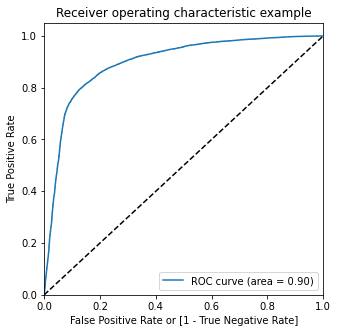

In [144]:
draw_roc(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [145]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_smt_pred_final[i]= y_train_smt_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,9.038600e-02,0,1,0,0,0,0,0,0,0,0,0
1,0,1.919389e-01,0,1,1,0,0,0,0,0,0,0,0
2,0,4.605993e-12,0,1,0,0,0,0,0,0,0,0,0
3,1,1.684891e-01,0,1,1,0,0,0,0,0,0,0,0
4,0,7.398789e-03,0,1,0,0,0,0,0,0,0,0,0


In [146]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.690714  0.974102  0.407326
0.2   0.2  0.748736  0.947736  0.549737
0.3   0.3  0.786671  0.924079  0.649263
0.4   0.4  0.810484  0.895159  0.725809
0.5   0.5  0.827419  0.861133  0.793705
0.6   0.6  0.832734  0.813975  0.851493
0.7   0.7  0.827237  0.751342  0.903132
0.8   0.8  0.752149  0.559533  0.944766
0.9   0.9  0.567792  0.150279  0.985306


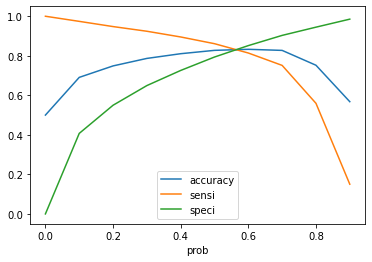

In [147]:
# Plotting accuracy sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### Observation:
- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.
- From the curve above, the optimum cutoff lies at around 0.51

In [148]:
y_train_smt_pred_final['final_churn_pred'] = y_train_smt_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.51 else 0)

y_train_smt_pred_final.head()

,Churned,Churn_Prob,Churn_Predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,9.038600e-02,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.919389e-01,0,1,1,0,0,0,0,0,0,0,0,0
2,0,4.605993e-12,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1.684891e-01,0,1,1,0,0,0,0,0,0,0,0,0
4,0,7.398789e-03,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
print('\t\t Evaluation metrics for model logm7 based on optimal cutoff')
print ('Confusion matrix:\n',confusion_matrix(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nAccuracy: ', accuracy_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nRecall: ', recall_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nPrecision: ', precision_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nF1 score: ', f1_score(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))
print ('\nClasification report:\n', classification_report(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Predict))

		 Evaluation metrics for model logm7 based on optimal cutoff
Confusion matrix:
 [[15232  3959]
 [ 2665 16526]]

Accuracy:  0.8274191027043927

Recall:  0.8611328226772966

Precision:  0.806736636563339

F1 score:  0.8330476862586953

Clasification report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     19191
           1       0.81      0.86      0.83     19191

    accuracy                           0.83     38382
   macro avg       0.83      0.83      0.83     38382
weighted avg       0.83      0.83      0.83     38382



#### Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
p, r, thresholds = precision_recall_curve(y_train_smt_pred_final.Churned, y_train_smt_pred_final.Churn_Prob)

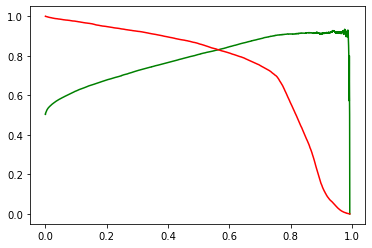

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Observation:
The precision and recall tradeoff point is also at around 0.51

#### Making predictions on the test set

In [153]:
# Scaling the test data
X_test[num_cols_train] = scaler.transform(X_test[num_cols_train])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,av_rech_amt_6_7,arpu_6_7,aon_range_6-12 months,aon_range_1-2 years,aon_range_2-5 years,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25,total_rech_data_range_8_>25,total_rech_num_range_8_<=10,total_rech_num_range_8_10-25,total_rech_num_range_8_>25
67125,0.768537,0.039534,0.026060,0.061878,0.062413,0.043373,0.177141,0.108839,0.441523,0.141445,0.072617,0.217788,0.093415,0.034513,0.011403,0.023013,0.083681,0.048371,0.221239,0.003468,0.005076,0.007594,0.000000,0.0,0.000000,0.074524,0.038017,0.155576,0.026062,0.002021,0.052257,0.000388,0.001185,0.070842,0.0,0.0,0.0,0.016954,0.002067,0.079283,0.063920,0.000000,0.0,0.000000,0.016966,0.065506,0.000000,0.0,0.0,0.057160,0.021618,0.145794,0.034663,0.039896,0.025967,0.265927,0.086460,0.349070,0.000000,0.005941,0.001440,0.201700,0.079275,0.255430,0.264738,0.038492,0.228448,0.003251,0.003562,0.117966,0.0,0.000000,0.000000,0.143938,0.023318,0.199417,0.222582,0.074735,0.283416,0.661997,0.0,0.370977,0.000000,0.000000,0.000000,0.065585,0.002726,0.037838,0.269926,0.220967,0.129329,0.618915,0.756383,0.621718,0.401137,0.694158,1.000000,0.375384,0.945658,0.000000,0.267815,0.120604,0.242399,0.673177,0.657803,0.681781,0.758692,0.363846,0.778739,0.193680,0.081987,0.038402,0.427147,0.636960,0.474762,0.521951,0.519086,0.518915,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.488666,1.000000,0.0,0.000000,0.0,1.0,1.0,1.0,0.633235,1.000000,0.868614,0.696011,0.779077,0,0,0,0,1,0,0,1,0,0
6189,0.768226,0.010208,0.003510,0.000000,0.069676,0.016677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021274,0.007309,0.000000,0.122048,0.026887,0.000000,0.103767,0.094972,0.000000,0.059815,0.0,0.000000,0.097438,0.026606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.010999,0.006903,0.0,0.081903,0.000000,0.000000,0.000000,0.0,0.0,0.054424,0.013931,0.000000,0.019425,0.011901,0.000000,0.040332,0.025994,0.005016,0.000000,0.000000,0.007953,0.037122

In [154]:
# Feature selection
X_test1=X_test[rfe_col_m7]
X_test1.head()

,loc_og_t2m_mou_8,std_og_mou_8,isd_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_mou_8,total_ic_mou_7,spl_ic_mou_8,isd_ic_mou_8,last_day_rch_amt_8,vol_3g_mb_8,arpu_6_7,aon_range_>5 years,total_rech_data_range_8_<=10,total_rech_data_range_8_10-25
67125,0.221239,0.079283,0.0,0.0,0.255430,0.199417,0.074735,0.370977,0.000000,0.000000,0.474762,0.779077,0,1,0
6189,0.000000,0.000000,0.0,0.0,0.004502,0.005180,0.023584,0.000000,0.057847,0.474188,1.000000,0.612432,0,1,0
32616,0.000057,0.045018,0.0,0.0,0.007988,0.007812,0.085059,0.000000,0.135991,0.018817,0.000000,0.371920,0,0,0
6676,0.264382,0.003079,0.0,0.0,0.278970,0.035939,0.170216,0.000000,0.000000,0.000000,0.087862,0.402049,0,1,0
69887,0.095149,0.013983,0.0,0.0,0.127598,0.160039,0.154343,0.000000,0.000000,0.244621,0.021620,0.378815,0,1,0


In [155]:
X_test1.shape

(9004, 15)

In [156]:
# Adding constant to the test model
X_test_SM = sm.add_constant(X_test1)

In [157]:
y_test_pred = res.predict(X_test_SM)
y_test_pred[:10]

67125    0.063720
6189     0.127809
32616    0.852985
6676     0.115291
69887    0.184486
22382    0.040329
82498    0.072056
95420    0.045228
76754    0.008673
19360    0.018549
dtype: float64

In [158]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
67125,0.063720
6189,0.127809
32616,0.852985
6676,0.115291
69887,0.184486


In [159]:
y_pred1 = y_pred1.rename(columns = {0:"Churn_Prob"})

In [160]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
67125,0
6189,0
32616,0
6676,0
69887,0


In [161]:
y_pred_final1 = pd.concat([y_test_df,y_pred1],axis=1)
y_pred_final1.head()

,Churn,Churn_Prob
67125,0,0.063720
6189,0,0.127809
32616,0,0.852985
6676,0,0.115291
69887,0,0.184486


In [162]:
y_pred_final1['test_churn_pred'] = y_pred_final1.Churn_Prob.map(lambda x: 1 if x>0.51 else 0)
y_pred_final1.head()

,Churn,Churn_Prob,test_churn_pred
67125,0,0.063720,0
6189,0,0.127809,0
32616,0,0.852985,1
6676,0,0.115291,0
69887,0,0.184486,0


In [163]:
print('\t\t Evaluation metrics for model logm7 on test dataset')
print ('Confusion matrix:\n',confusion_matrix(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nAccuracy: ', accuracy_score(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nRecall: ', recall_score(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nPrecision: ', precision_score(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nF1 score: ', f1_score(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nClasification report:\n', classification_report(y_pred_final1.Churn, y_pred_final1.test_churn_pred))

		 Evaluation metrics for model logm7 on test dataset
Confusion matrix:
 [[6650 1577]
 [ 149  628]]

Accuracy:  0.8083074189249223

Recall:  0.8082368082368082

Precision:  0.28480725623582764

F1 score:  0.42119382964453383

Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8227
           1       0.28      0.81      0.42       777

    accuracy                           0.81      9004
   macro avg       0.63      0.81      0.65      9004
weighted avg       0.92      0.81      0.85      9004



##### Observation:
- The accuracy of the predicted model is:  80.8 %
- The recall of the predicted model is:  80.8 %

The model created is based on a sentivity/recall model, i.e. the True positive rate is given more importance as the actual and prediction of customer Churn. As the recall value is high, this can be considered a good model.

#### ROC curve for the test dataset

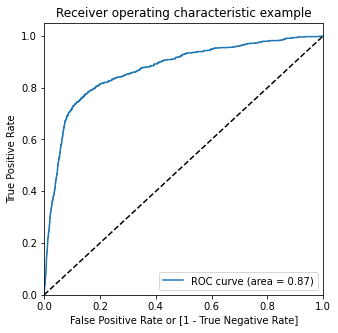

In [164]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final1.Churn,y_pred_final1.Churn_Prob, drop_intermediate = False )

# Plotting the curve for the obtained metrics
draw_roc(y_pred_final1.Churn,y_pred_final1.Churn_Prob)

##### Observation:
The AUC score for train dataset is 0.90 and the test dataset is 0.87.

This can be considered a good model.

### Decision Tree Model

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
# Decision Tree
dtc_smt = DecisionTreeClassifier(random_state=42, max_depth=4)

In [167]:
%%time
dtc_smt.fit(X_train_smt, y_train_smt)

CPU times: user 1.74 s, sys: 54.2 ms, total: 1.8 s
Wall time: 1.97 s


DecisionTreeClassifier(max_depth=4, random_state=42)

In [168]:
y_train_dtc_smt_pred = dtc_smt.predict(X_train_smt)
y_test_dtc_pred = dtc_smt.predict(X_test)

In [169]:
print("\t\tEvaluation metrics for train dataset")
print ('\nConfusion matrix:\n',confusion_matrix(y_train_smt, y_train_dtc_smt_pred))
print ('\nAccuracy: ', accuracy_score(y_train_smt, y_train_dtc_smt_pred))
print ('\nRecall: ', recall_score(y_train_smt, y_train_dtc_smt_pred))
print ('\nPrecision: ', precision_score(y_train_smt, y_train_dtc_smt_pred))
print ('\nF1 score: ', f1_score(y_train_smt, y_train_dtc_smt_pred))
print ('\nClasification report:\n', classification_report(y_train_smt,y_train_dtc_smt_pred))

		Evaluation metrics for train dataset

Confusion matrix:
 [[17094  2097]
 [ 2499 16692]]

Accuracy:  0.8802563701735189

Recall:  0.8697827106456152

Precision:  0.8883921443397733

F1 score:  0.8789889415481832

Clasification report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     19191
           1       0.89      0.87      0.88     19191

    accuracy                           0.88     38382
   macro avg       0.88      0.88      0.88     38382
weighted avg       0.88      0.88      0.88     38382



In [170]:
print("\t\t Evaluation metrics for test dataset before hyperparameter tuning")
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_test_dtc_pred))
print ('\nAccuracy: ', accuracy_score(y_test, y_test_dtc_pred))
print ('\nRecall: ', recall_score(y_test, y_test_dtc_pred))
print ('\nPrecision: ', precision_score(y_test, y_test_dtc_pred))
print ('\nF1 score: ', f1_score(y_test, y_test_dtc_pred))
print ('\nClasification report:\n', classification_report(y_test,y_test_dtc_pred))

		 Evaluation metrics for test dataset before hyperparameter tuning

Confusion matrix:
 [[7334  893]
 [ 167  610]]

Accuracy:  0.8822745446468236

Recall:  0.7850707850707851

Precision:  0.40585495675316036

F1 score:  0.5350877192982456

Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      8227
           1       0.41      0.79      0.54       777

    accuracy                           0.88      9004
   macro avg       0.69      0.84      0.73      9004
weighted avg       0.93      0.88      0.90      9004



##### Observation:
The recall value for train data set is 0.87 and for test data set is 0.78

#### Hyperparameter tuning for the Decision Tree

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
dtc_hyp = DecisionTreeClassifier(random_state=42)

In [173]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [174]:
grid_search = GridSearchCV(estimator=dtc_hyp,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [175]:
%%time
grid_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 3.5 s, sys: 481 ms, total: 3.98 s
Wall time: 2min 1s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [176]:
grid_search.best_score_

0.9133192275920073

In [177]:
dtc_best = grid_search.best_estimator_
dtc_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [178]:
y_test_dtc_best_pred = dtc_best.predict(X_test)

In [179]:
print("\t\t Evaluation metrics for test dataset after hyperparameter tuning")
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_test_dtc_best_pred))
print ('\nAccuracy: ', accuracy_score(y_test, y_test_dtc_best_pred))
print ('\nRecall: ', recall_score(y_test, y_test_dtc_best_pred))
print ('\nPrecision: ', precision_score(y_test, y_test_dtc_best_pred))
print ('\nF1 score: ', f1_score(y_test, y_test_dtc_best_pred))
print ('\nClasification report:\n', classification_report(y_test,y_test_dtc_best_pred))

		 Evaluation metrics for test dataset after hyperparameter tuning

Confusion matrix:
 [[7479  748]
 [ 247  530]]

Accuracy:  0.8894935584184807

Recall:  0.6821106821106822

Precision:  0.41471048513302033

F1 score:  0.5158150851581509

Clasification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8227
           1       0.41      0.68      0.52       777

    accuracy                           0.89      9004
   macro avg       0.69      0.80      0.73      9004
weighted avg       0.92      0.89      0.90      9004



##### Observation:
After hyperparameter tuning, for the best model, recall value for test dataset is 0.68

This indicates that it is a poor performing model.

### Random Forest Model

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
# Random Forest 
rf_smt = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [182]:
%%time
rf_smt.fit(X_train_smt, y_train_smt)

CPU times: user 562 ms, sys: 49 ms, total: 611 ms
Wall time: 624 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [183]:
rf_smt.oob_score_

0.8238236673440675

In [184]:
y_pred_rf_smt = rf_smt.predict(X_test)

In [185]:
print ('\t\tEvaluation metrics for test dataset before hyperparameter tuning')
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))
print ('\nAccuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('\nRecall: ', recall_score(y_test, y_pred_rf_smt))
print ('\nPrecision: ', precision_score(y_test, y_pred_rf_smt))
print ('\nF1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('\nClasification report:\n', classification_report(y_test,y_pred_rf_smt))

		Evaluation metrics for test dataset before hyperparameter tuning

Confusion matrix:
 [[7490  737]
 [ 213  564]]

Accuracy:  0.8944913371834741

Recall:  0.7258687258687259

Precision:  0.4335126825518832

F1 score:  0.5428296438883542

Clasification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      8227
           1       0.43      0.73      0.54       777

    accuracy                           0.89      9004
   macro avg       0.70      0.82      0.74      9004
weighted avg       0.93      0.89      0.91      9004



#### Hyperparameter tuning for the Random Forest

In [186]:
rf_hyp = RandomForestClassifier(random_state=48, n_jobs=-1)

In [187]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [188]:
grid_search = GridSearchCV(estimator=rf_hyp,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [189]:
%%time
grid_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 38.7 s, sys: 718 ms, total: 39.4 s
Wall time: 12min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=48),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [190]:
grid_search.best_score_

0.9454957103891429

In [191]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=48)

In [192]:
y_test_rf_best_pred = rf_best.predict(X_test)

In [193]:
print ('\t\t Evaluation metrics for test dataset after hyperparameter tuning')
print ('\nConfusion matrix:\n',confusion_matrix(y_test, y_test_rf_best_pred))
print ('\nAccuracy: ', accuracy_score(y_test, y_test_rf_best_pred))
print ('\nRecall: ', recall_score(y_test, y_test_rf_best_pred))
print ('\nPrecision: ', precision_score(y_test, y_test_rf_best_pred))
print ('\nF1 score: ', f1_score(y_test, y_test_rf_best_pred))
print ('\nClasification report:\n', classification_report(y_test,y_test_rf_best_pred))

		 Evaluation metrics for test dataset after hyperparameter tuning

Confusion matrix:
 [[7816  411]
 [ 239  538]]

Accuracy:  0.9278098622834295

Recall:  0.6924066924066924

Precision:  0.5669125395152792

F1 score:  0.6234067207415991

Clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      8227
           1       0.57      0.69      0.62       777

    accuracy                           0.93      9004
   macro avg       0.77      0.82      0.79      9004
weighted avg       0.94      0.93      0.93      9004



##### Observation:
After hyperparameter tuning, for the best model the recall value for test data set is 0.69

This indicates that it is a poor performing model.

### Final Model Selection

In [194]:
print ('\nLogistic Regression Recall Score: ', recall_score(y_pred_final1.Churn, y_pred_final1.test_churn_pred))
print ('\nDecision Tree Recall Score: ', recall_score(y_test, y_test_dtc_best_pred))
print ('\nRandom Forest Recall Score: ', recall_score(y_test, y_test_rf_best_pred))


Logistic Regression Recall Score:  0.8082368082368082

Decision Tree Recall Score:  0.6821106821106822

Random Forest Recall Score:  0.6924066924066924


##### Observation:
The recall score for the Logistic Regression model is high, thus it can be considered a better performing model to be used for the prediction of customer churn.

## 6. Important Predictors

In [195]:
# Feature variables of Logistic Regression model logm7
rfe_col_m7

Index(['loc_og_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'vol_3g_mb_8', 'arpu_6_7', 'aon_range_>5 years', 'total_rech_data_range_8_<=10', 'total_rech_data_range_8_10-25'], dtype='object')

##### Observation:
Minimising the false negatives is the most important factor for churn prediction. Hence,based on the Recall scores, the best performing model is the Logistic Regression model logm7.

Thus, the feature variables used in the model logm7 are considered important for prediction of customer churn. They are:
1. loc_og_t2m_mou_8
2. std_og_mou_8
3. isd_og_mou_8
4. og_others_8
5. loc_ic_mou_8
6. std_ic_mou_8
7. total_ic_mou_7
8. spl_ic_mou_8
9. isd_ic_mou_8
10. last_day_rch_amt_8
11. vol_3g_mb_8
12. arpu_6_7
13. aon_range_>5 years
14. total_rech_data_range_8_<=10
15. total_rech_data_range_8_10-25'

## 7. Most Important Observations & Recommendations

__Observation 1:__

_Maximum churn occurs within 6 months and it decreases for customers who are on the network for a longer period of time._

__Recommendation:__

_The Telecom company should create a strategy of giving discounted prices in the range of 7-8% to Risky High value customers in their 5th month (Risky customers are those for which our model gives a 1). This will prevent them from looking out for competitor brands. This way the company will be able to prevent high value customers in the 1st year._

 

__Observation 2:__

_On observing volume of 2g or 3g data usage of good phase months, we see that the usage is significantly lesser amongst the people who churn. We also observe that vol usage of 2g & 3g has dropped for churned customers from good phase to action phase, while for non-churned it remains exactly the same._

_One probable reason can be that internet usage is low even in the months of good phase due to poor internet connectivity at some places and hence eventually the customer decided to churn._

__Recommendation:__

_The Telecom Company should first check and then improve the internet connectivity issues in those CIRCLE_IDs where churn rate is high. This will significantly reduce the churn in those areas._

 

__Observation 3:__

_Total outgoing minutes of usage for churned customers drastically dropped from good phase (200 median minutes of usage) to action month (50 median minutes of usage) while for Non churned customers it remains almost similar (200 median minutes of usage). Thus, it shows that if there is a significant drop in minutes of usage in the 8th month, then there are high chances of churning._

__Recommendation:__

_The Telecom provider / company should either reduce the price of outgoing calls or provide more minutes of outgoing calls in relatively small recharge amount packages. This might help in preventing churn of customers whose minutes of usage for outgoing calls is higher. The company might also create bundled packages including both calls and data so that customers find that price is reduced and at the same time, there is not a major drop in revenue for the telecom company._